### Que-1 : Linear Regression

In [43]:
import pandas as pd
import numpy as np

# Step 1: Load data and Identify features abd lebels
df = pd.read_csv("weight-height.csv")

x = df[['Height']]
y = df[['Weight']]
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [46]:
# Step 2: Split  data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [47]:
# Print X and Y fro the test set
print("---Test Set Data---")
print("X_test (Experiance) : \n",X_test)
print("ny_test (salary) :\n ",y_test)
print("_-------------------------\n")

---Test Set Data---
X_test (Experiance) : 
          Height
9394  64.723877
898   67.272171
2398  74.520972
5906  65.880014
2343  64.846301
...         ...
1037  69.084897
2899  71.860625
9549  66.071107
2740  65.641536
6690  64.210866

[2000 rows x 1 columns]
ny_test (salary) :
            Weight
9394  138.085796
898   187.363366
2398  216.533191
5906  131.761443
2343  157.718438
...          ...
1037  189.856786
2899  202.906859
9549  152.420031
2740  170.100647
6690  158.206206

[2000 rows x 1 columns]
_-------------------------



In [48]:
# Step 3:
from sklearn.linear_model import  LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [49]:
# Step 4: Make Predictions

y_pred = model.predict(X_test)
print("Predicted Values on test set :",y_pred)


Predicted Values on test set : [[148.7894772 ]
 [168.43520123]
 [224.31884497]
 ...
 [159.17576427]
 [155.86404539]
 [144.83449257]]


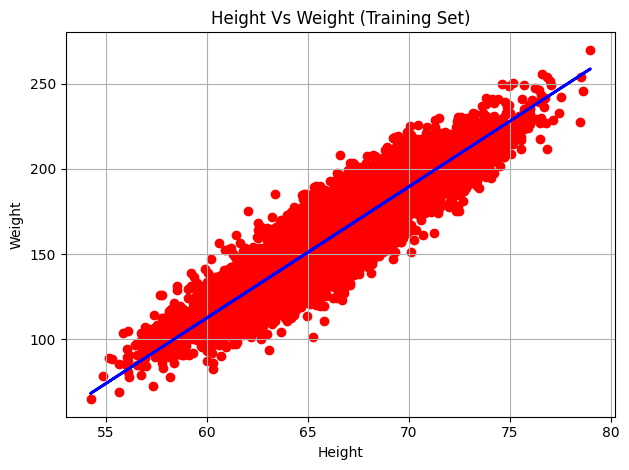

In [50]:
# Step 5: Visualize Training set results
import matplotlib.pyplot as plt

plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,model.predict(X_train),color='blue',linewidth=2)
plt.title('Height Vs Weight (Training Set)')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()

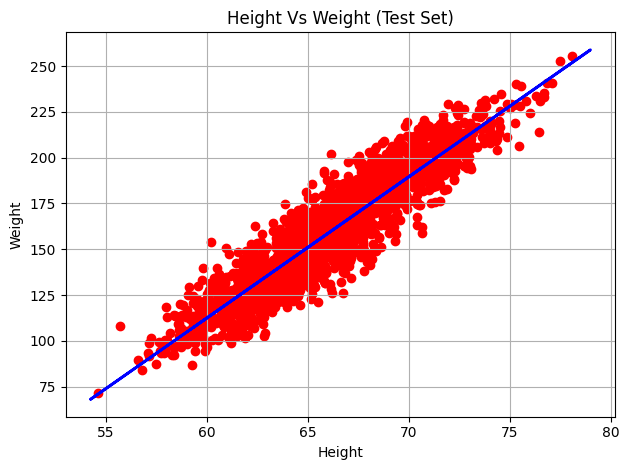

In [51]:
# Step 6: Visualize Test Set Results.

plt.scatter(X_test,y_test,color='red')
plt.plot(X_train,model.predict(X_train),color='blue',linewidth=2)
plt.title('Height Vs Weight (Test Set)')
plt.xlabel("Height")
plt.ylabel("Weight")
plt.grid(True)
plt.tight_layout()
plt.show()

In [52]:
# Step 7: making New predctions

new_X_values_df = pd.DataFrame({'Height' : [85,90,55,78,66.172652]})
new_y_pred = model.predict(new_X_values_df)
print("\nPredictions for new Experiance Values (85,90,55,78,66.172652):\n", new_y_pred) # 136.777454


Predictions for new Experiance Values (85,90,55,78,66.172652):
 [[305.10547826]
 [343.6522948 ]
 [ 73.82457904]
 [251.13993511]
 [159.95861242]]


In [53]:
# Step 8: Model Evaluation

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

mae = mean_absolute_error(y_test,y_pred)

mse = mean_squared_error(y_test,y_pred)

r2 = r2_score(y_test,y_pred)


print("\nModel Evaluation Metrics : ")
print("Mean Absolute Error (MAE) : ",mae)
print("Mean Squared Error (MSE) : ",mse)
print("R2 Score: ",r2_score)


Model Evaluation Metrics : 
Mean Absolute Error (MAE) :  9.662897842061215
Mean Squared Error (MSE) :  146.5367721395743
R2 Score:  <function r2_score at 0x7bb1a4e4c360>


### Multiple Linear Regression:

In [58]:
# Multiple Linear Regression
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.ops import comparison_op
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step :1 Load the dataset and define features (x) and label (y)
df = pd.read_csv('Australian_Student_PerformanceData.csv')
df.head()


,Student ID,University ID,University Name,Age,Gender,Major,Year of Study,GPA,High School GPA,Entrance Exam Score,Attendance Rate,Participation in Extracurricular Activities,Part-time Job,Hours of Study per Week,Family Income,Parental Education Level,Accommodation Type,Distance from Home to University,Internet Access at Home,Library Usage,Access to Academic Resources,Health Condition,Mental Health Status,Scholarship,Financial Aid,Tutor Support,Counseling Services,Transportation Mode,Hours of Sleep per Night,Diet Quality,Exercise Frequency,Social Integration,Peer Support,Language Proficiency,Use of Online Learning Platforms,Class Participation,Project/Assignment Scores,Midterm Exam Scores,Final Exam Scores,Attendance at Office Hours,Group Work Participation,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Learning Style,Study Environment,Core Course Average,Extracurricular Participation,Peer Evaluations,Performance
0,1,86,University C,25,F,EE,1,2.06,3.50,60,0.84,0,1,17,145601,Master,Off-campus,34,0,2,1,Good,Fair,0,1,1,1,Car,7,Fair,4,Poor,1,Excellent,2,Poor,70,84,81,5,1,0,0,61,5,Visual,Good,51,0,83,Satisfactory
1,2,17,University A,26,F,ME,4,2.12,3.46,52,0.73,1,0,21,53989,NaN,With family,34,0,13,0,Poor,Excellent,1,1,0,0,Biking,5,Excellent,0,Excellent,1,Fair,2,Poor,58,82,79,0,0,0,1,72,7,Reading/Writing,Excellent,60,0,56,Poor
2,3,52,University C,20,M,CS,4,2.72,3.33,94,0.96,0,1,34,109617,Doctorate,Off-campus,19,0,19,0,Fair,Poor,0,0,1,1,Car,8,Good,3,Fair,1,Good,0,Excellent,57,74,53,7,0,0,0,79,2,Auditory,Excellent,65,0,52,Satisfactory
3,4,91,University A,25,M,ME,1,3.05,3.54,65,0.84,1,1,21,152274,Master,With family,88,0,10,1,Poor,Fair,1,1,0,0,Walking,7,Poor,4,Poor,1,Excellent,3,Good,61,85,81,3,1,1,0,50,7,Kinesthetic,Excellent,58,1,65,Needs Improvement
4,5,33,University C,22,F,CE,3,1.86,3.35,51,0.92,1,0,37,86133,High School,Dormitory,66,0,2,1,Poor,Fair,1,0,1,1,Biking,5,Excellent,3,Poor,1,Excellent,5,Excellent,85,53,93,5,1,1,1,68,4,Visual,Poor,62,0,71,Good


In [59]:
df['Final Exam Scores'].unique()

array([81, 79, 53, 93, 68, 92, 85, 62, 52, 95, 66, 98, 67, 97, 57, 78, 50,
       56, 99, 60, 73, 84, 71, 76, 70, 82, 90, 51, 75, 77, 91, 87, 96, 58,
       54, 94, 63, 69, 72, 80, 74, 64, 88, 86, 89, 65, 61, 59, 83, 55])

In [25]:
pd.set_option('display.max_columns', None)

In [60]:
x = df[['High School GPA', 'Entrance Exam Score', 'Attendance Rate', 'Hours of Study per Week','Library Usage','Hours of Sleep per Night','Project/Assignment Scores','Midterm Exam Scores']]

y = df['Final Exam Scores']

In [61]:
# Step 2 : Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=42)

In [62]:
# Step 3: Fit Multiple Linear Regression to Training Data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [63]:
# Print the coefficients and intercept of the model
print("------ Model Coefficients and intercept -----")
print("Coefficients : ", model.coef_)
print("Intercept : ", model.intercept_)
print("--------------------------------------------------------------")


------ Model Coefficients and intercept -----
Coefficients :  [-0.02302126 -0.004281    0.70480412 -0.01752541  0.00094977 -0.01190824
 -0.00247517 -0.00690112]
Intercept :  75.5109648061768
--------------------------------------------------------------


In [64]:
# Step 4 : Make the predictions on test set
y_pred = model.predict(x_test)

print(" --------------- Actual vs Predicted     (Test set) ---------")
# Create a Dataframe too compare actual and predicted values
comparison_df = pd.DataFrame({'Actual Final Values ': y_test, 'Predicted Final Values': y_pred})
print(comparison_df.head(10))
print("-------------------------------------------------------------------")

 --------------- Actual vs Predicted     (Test set) ---------
       Actual Final Values   Predicted Final Values
19212                    81               74.421031
6491                     51               74.709797
94935                    69               74.971839
63684                    74               74.303100
63167                    79               74.550510
13735                    93               74.667593
83754                    50               74.759550
78465                    67               74.156857
85875                    53               74.227705
56716                    80               74.311853
-------------------------------------------------------------------


In [65]:
# Step 5: Model Evaluation
# Calculate Mean Absolute Error, Mean Squared Error, R2 Score
mae = mean_absolute_error(y_test, y_pred)
mse= mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n ----- Model Evaluation Metrics---------- ")
print(f"Mean Absolute Error (MAE) :  {mae : .2f}")
print(f"Mean Squared Error (MSE) :  {mse : .2f}")
print(f"R2 Score :  {r2 : .2f}")


 ----- Model Evaluation Metrics---------- 
Mean Absolute Error (MAE) :   12.52
Mean Squared Error (MSE) :   208.94
R2 Score :  -0.00


In [67]:
### Random Values
# Step 6 : Make new predictions with custom input
print(" -------- Making New Predictions------")
# Create a Dataframe for new input values , ensuring column names match training features
new_data_for_prediction = pd.DataFrame({
    'High School GPA' : [3.5, 4.0, 3.0],
    'Entrance Exam Score' : [85, 92, 78],
    'Attendance Rate' : [95, 98, 90],
    'Hours of Study per Week' : [15, 20, 10],
    'Library Usage' : [5, 7, 3],
    'Hours of Sleep per Night' : [7, 8, 6],
    'Project/Assignment Scores' : [90, 95, 85],
    'Midterm Exam Scores' : [88, 91, 80]
})
new_predictions = model.predict(new_data_for_prediction)

print("\n New Data for Prediction :\n", new_data_for_prediction)
print("\n Predicted Final Exam Scores :\n",new_predictions)
print("----------------------------------------")


 -------- Making New Predictions------

 New Data for Prediction :
    High School GPA  Entrance Exam Score  Attendance Rate  \
0              3.5                   85               95   
1              4.0                   92               98   
2              3.0                   78               90   

   Hours of Study per Week  Library Usage  Hours of Sleep per Night  \
0                       15              5                         7   
1                       20              7                         8   
2                       10              3                         6   

   Project/Assignment Scores  Midterm Exam Scores  
0                         90                   88  
1                         95                   91  
2                         85                   80  

 Predicted Final Exam Scores :
 [140.85134237 142.79356211 137.53402001]
----------------------------------------
 -------- Making New Predictions (Scaled to 100)------

 New Data for Prediction :


In [68]:
# Step 6: Make new prediction with custome input
print("---Making New Predictions--------")
# create a DataFrame for new input values, ensuring column names match training features
new_data_for_prediction = pd.DataFrame({
    'High School GPA':[1.16,2.12,3.24],       #example values for satisfcation
    'Entrance Exam Score':[54,75,91],
    'Attendance Rate':[0.57,0.76,0.96],
    'Hours of Study per Week':[7,13,39],
    'Library Usage':[2,9,18],
    'Hours of Sleep per Night':[4,5,9],
    'Project/Assignment Scores':[50,72,89],
    'Midterm Exam Scores':[57,83,92]
    })
new_predictions = model.predict(new_data_for_prediction)

print("\n New Data for Predictions:\n", new_data_for_prediction)
print("\n Predicted Final Exam Scores:\n", new_predictions)



---Making New Predictions--------

 New Data for Predictions:
    High School GPA  Entrance Exam Score  Attendance Rate  \
0             1.16                   54             0.57   
1             2.12                   75             0.76   
2             3.24                   91             0.96   

   Hours of Study per Week  Library Usage  Hours of Sleep per Night  \
0                        7              2                         4   
1                       13              9                         5   
2                       39             18                         9   

   Project/Assignment Scores  Midterm Exam Scores  
0                         50                   57  
1                         72                   83  
2                         89                   92  

 Predicted Final Exam Scores:
 [74.9692906  74.64690668 74.09465401]
